This notebook is a sample code with Japanese comments.

# 2.4 ここで差がつく！　仮説に基づいて新しい特徴量を作ってみよう

# 再現性の大切さ

In [ ]:
!pip install ydata-profiling


In [4]:
api_token = {"username":"jesscnchen","key":"2e017306717af1e838e2f0368456cb8e"}
import json
import zipfile
import os

if not os.path.exists("/root/.kaggle"):
    os.makedirs("/root/.kaggle")

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

if not os.path.exists("/kaggle"):
    os.makedirs("/kaggle")
os.chdir('/kaggle')
!kaggle datasets download -d shuofxz/titanic-machine-learning-from-disaster --force

!ls /kaggle

!unzip titanic-machine-learning-from-disaster.zip

Dataset URL: https://www.kaggle.com/datasets/shuofxz/titanic-machine-learning-from-disaster
License(s): DbCL-1.0
  0% 0.00/33.1k [00:00<?, ?B/s]
100% 33.1k/33.1k [00:00<00:00, 2.08MB/s]
titanic-machine-learning-from-disaster.zip
Archive:  titanic-machine-learning-from-disaster.zip
  inflating: test.csv                
  inflating: train.csv               


In [6]:
!ls /kaggle
!pwd

/kaggle


In [26]:
import numpy as np
import pandas as pd

train = pd.read_csv('../kaggle/train.csv')
test = pd.read_csv('../kaggle/test.csv')
gender_submission = pd.read_csv('../kaggle/submission.csv')

#train = pd.read_csv('../input/titanic/train.csv')
#test = pd.read_csv('../input/titanic/test.csv')
#gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)

<ipython-input-26-56e36b8fb6e2>:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
<ipython-input-26-56e36b8fb6e2>:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
<ipython-inp

In [9]:
age_avg = data['Age'].mean()
age_std = data['Age'].std()

np.random.randint(age_avg - age_std, age_avg + age_std)

36

In [10]:
np.random.randint(age_avg - age_std, age_avg + age_std)

42

In [11]:
data['Age'].fillna(data['Age'].median(), inplace=True)

<ipython-input-11-ca72a6c8cabd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [12]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [13]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,0,22.0,7.2500,0
1,1,1,38.0,71.2833,1
2,3,1,26.0,7.9250,0
3,1,1,35.0,53.1000,0
4,3,0,35.0,8.0500,0


In [14]:
y_train.head()

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


## 機械学習アルゴリズム

In [15]:
from sklearn.linear_model import LogisticRegression


clf = LogisticRegression(penalty='l2', solver='sag', random_state=0)

In [16]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(



# 仮説から新しい特徴量を作る

In [27]:

train = pd.read_csv('../kaggle/train.csv')
test = pd.read_csv('../kaggle/test.csv')
gender_submission = pd.read_csv('../kaggle/submission.csv')

#train = pd.read_csv('../input/titanic/train.csv')
#test = pd.read_csv('../input/titanic/test.csv')
#gender_submission = pd.read_csv('../input/titanic/gender_submission.csv')

data = pd.concat([train, test], sort=False)

data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
data['Embarked'].fillna(('S'), inplace=True)
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
data['Fare'].fillna(np.mean(data['Fare']), inplace=True)
data['Age'].fillna(data['Age'].median(), inplace=True)

<ipython-input-27-92ed100ef292>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
<ipython-input-27-92ed100ef292>:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Sex'].replace(['male', 'female'], [0, 1], inplace=True)
<ipython-inp

In [19]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


<Axes: xlabel='FamilySize', ylabel='count'>

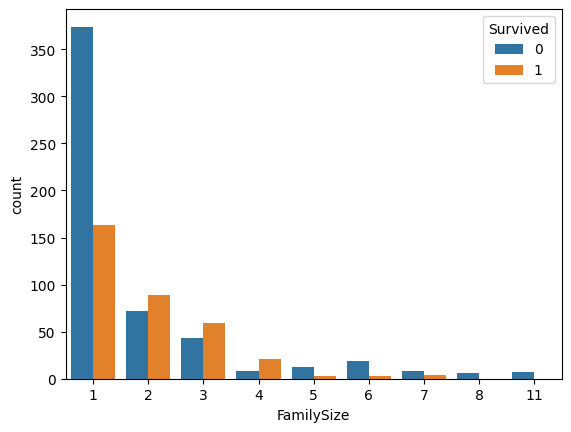

In [20]:
import seaborn as sns


data['FamilySize'] = data['Parch'] + data['SibSp'] + 1
train['FamilySize'] = data['FamilySize'][:len(train)]
test['FamilySize'] = data['FamilySize'][len(train):]
sns.countplot(x='FamilySize', data = train, hue='Survived')

In [21]:
data['IsAlone'] = 0
data.loc[data['FamilySize'] == 1, 'IsAlone'] = 1

train['IsAlone'] = data['IsAlone'][:len(train)]
test['IsAlone'] = data['IsAlone'][len(train):]

In [22]:
delete_columns = ['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin']
data.drop(delete_columns, axis=1, inplace=True)

train = data[:len(train)]
test = data[len(train):]

y_train = train['Survived']
X_train = train.drop('Survived', axis=1)
X_test = test.drop('Survived', axis=1)

In [23]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,3,0,22.0,7.2500,0,2,0
1,1,1,38.0,71.2833,1,2,0
2,3,1,26.0,7.9250,0,1,1
3,1,1,35.0,53.1000,0,2,0
4,3,0,35.0,8.0500,0,1,1


## 予測性能の比較

In [28]:
#sub = pd.read_csv('../input/titanic/gender_submission.csv')
sub = pd.read_csv('../kaggle/submission.csv')


In [29]:
clf.fit(X_train, y_train)
y_pred_familysize_isalone = clf.predict(X_test)

sub['Survived'] = list(map(int, y_pred_familysize_isalone))
sub.to_csv('submission_familysize_isalone.csv', index=False)

sub.head()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [30]:
clf.fit(X_train.drop('FamilySize', axis=1), y_train)
y_pred_isalone = clf.predict(X_test.drop('FamilySize', axis=1))

sub['Survived'] = list(map(int, y_pred_isalone))
sub.to_csv('submission_isalone.csv', index=False)

sub.head()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [31]:
clf.fit(X_train.drop('IsAlone', axis=1), y_train)
y_pred_familysize = clf.predict(X_test.drop('IsAlone', axis=1))

sub['Survived'] = list(map(int, y_pred_familysize))
sub.to_csv('submission_familysize.csv', index=False)

sub.head()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [32]:
clf.fit(X_train.drop(['FamilySize', 'IsAlone'], axis=1), y_train)
y_pred = clf.predict(X_test.drop(['FamilySize', 'IsAlone'], axis=1))

sub['Survived'] = list(map(int, y_pred))
sub.to_csv('submission.csv', index=False)

sub.head()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
